In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import joblib

%matplotlib inline

In [4]:
# Load the dataset
df = pd.read_csv('..//data/processed/DataSet1 - DataSet1.csv')
df['year'] = pd.to_datetime(df['Release Date']).dt.year


In [170]:
data = df.copy()[['Movie Title','Studio','Director','Genre','IMDb Rating', 'year', 'Profit ($mill)']]
data['year'] = data['year'].astype('str') 


In [149]:
len(data['Movie Title'])


608

There are 608 movie titles that are available in this dataset.


In [150]:
data['Genre'].unique()


array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

There are about 15 different movie genres in this dataset



In [151]:
data.columns

Index(['Movie Title', 'Studio', 'Director', 'Genre', 'IMDb Rating', 'year',
       'Profit ($mill)'],
      dtype='object')

##### Movie Year

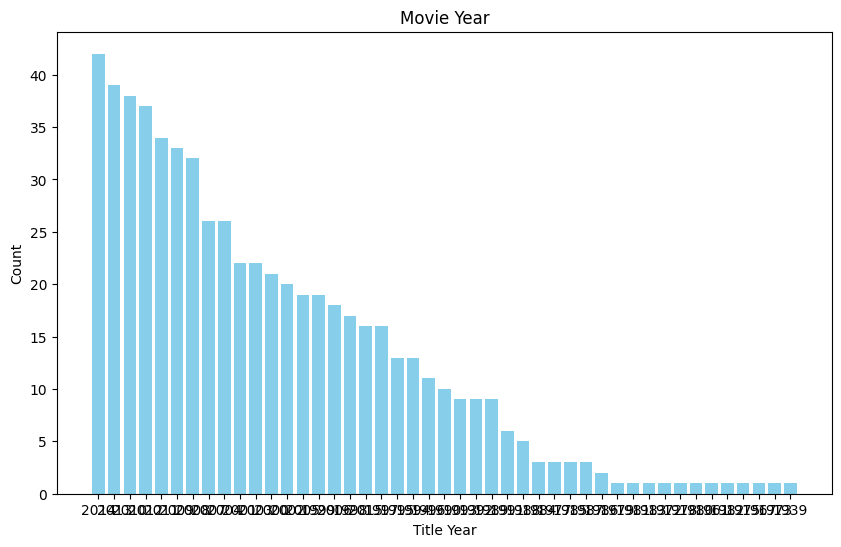

In [152]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10, 6))
plt.bar(data['year'].value_counts().index, data['year'].value_counts().values, color='skyblue')
plt.xlabel('Title Year')
plt.ylabel('Count')
plt.title('Movie Year')
plt.show()
#We can see the most of the movies which are released after 1980

In [153]:
data = df.copy()[['Movie Title','Studio','Director','Genre','IMDb Rating', 'year', 'Profit ($mill)','Budget ($mill)','Profit%']]

In [154]:
df.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US', 'year'],
      dtype='object')

##### #Top 20 directors based on the IMDB ratings


C:\Users\gaura\AppData\Local\Temp\ipykernel_18900\886063144.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


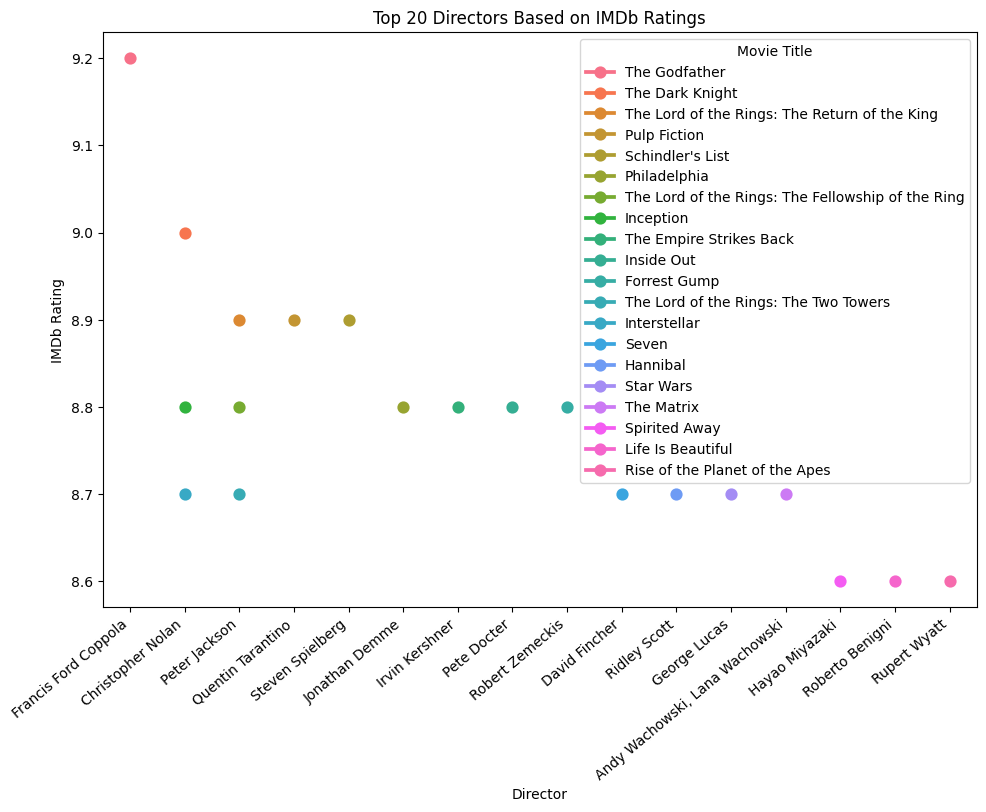

In [155]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))


data = data.sort_values(by='IMDb Rating', ascending=False)

# Select the top 20 movies based on IMDb rating
data_top = data.head(20)

# Create a point plot showing director vs. IMDb rating for the top 20 movies
ax = sns.pointplot(x='Director', y='IMDb Rating', hue='Movie Title', data=data_top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Top 20 Directors Based on IMDb Ratings')
plt.xlabel('Director')
plt.ylabel('IMDb Rating')
plt.show()


In [156]:
data = df.copy()[['Movie Title','Studio','Director','Genre','IMDb Rating', 'year', 'Profit ($mill)','Budget ($mill)','Profit%']]

In [157]:
data['Profit ($mill)'] = data['Profit ($mill)'].str.replace(',', '').astype(float)


##### Average rating

In [171]:
data = df.copy()[['Movie Title','Studio','Director','Genre','IMDb Rating','MovieLens Rating', 'year', 'Profit ($mill)','Budget ($mill)','Profit%']]

In [172]:
# Applying transformation to MovieLens Rating column
data['MovieLens Rating'] = data['MovieLens Rating'] * 2

#finding the average ratings 
data.insert(10, column='Avg_rating', value=data.loc[:, ['IMDb Rating', 'MovieLens Rating']].mean(axis=1))

C:\Users\gaura\AppData\Local\Temp\ipykernel_18900\1152544319.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


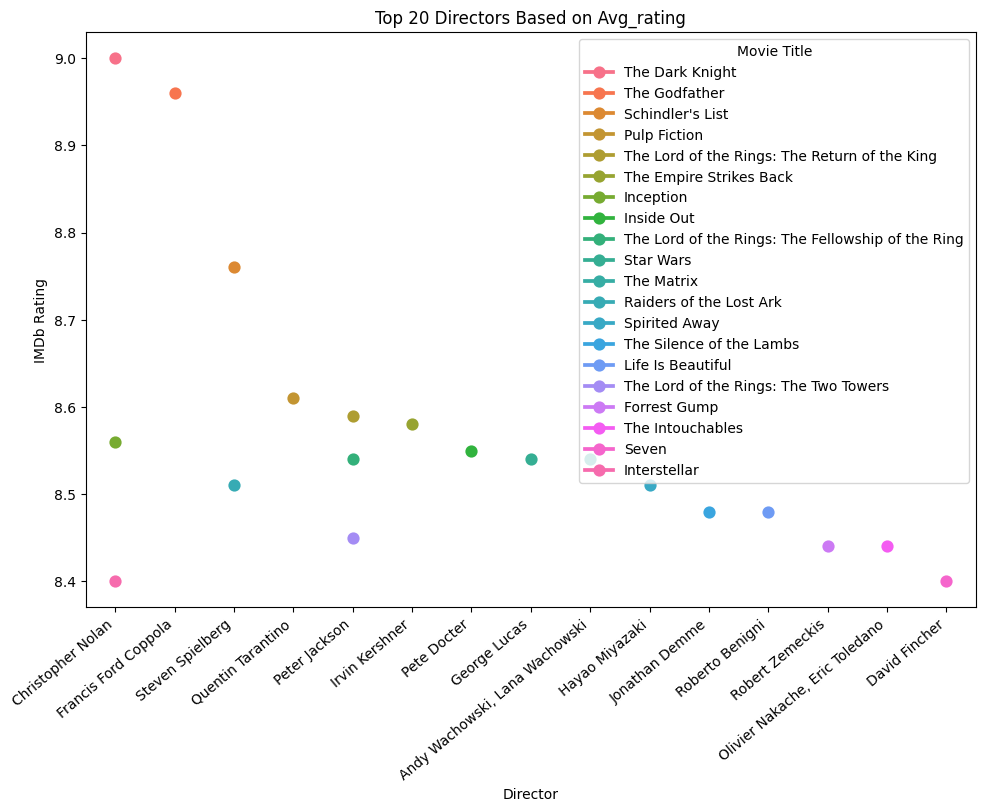

In [173]:
#Top 20 directors based on the IMDB ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))


data = data.sort_values(by='Avg_rating', ascending=False)

# Select the top 20 movies based on IMDb rating
data_top = data.head(20)

# Create a point plot showing director vs. IMDb rating for the top 20 movies
ax = sns.pointplot(x='Director', y='Avg_rating', hue='Movie Title', data=data_top)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Top 20 Directors Based on Avg_rating')
plt.xlabel('Director')
plt.ylabel('IMDb Rating')
plt.show()


##### Top 5 Studios

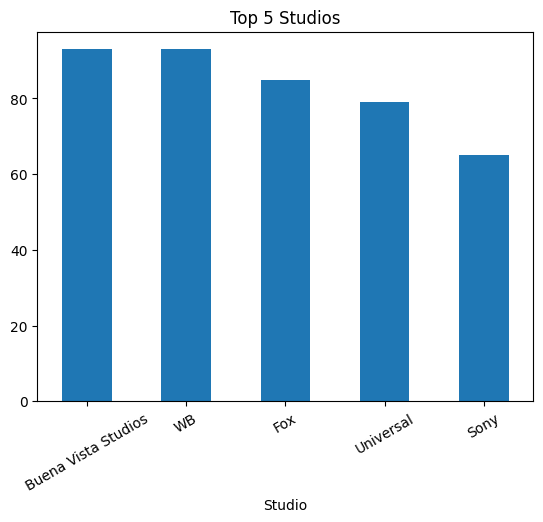

In [29]:
# Top 5 studios
df.groupby('Studio').size().nlargest().plot(kind='bar', title='Top 5 Studios')
plt.xticks(rotation=30)
plt.show()


##### Runtime analysis

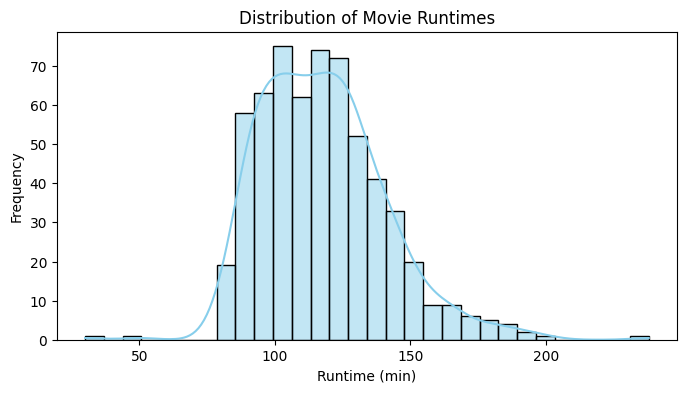

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Runtime (min)' column exists in your DataFrame 'data'

# Create a distribution plot for the 'Runtime (min)' column
plt.figure(figsize=(8, 4))
sns.histplot(df['Runtime (min)'], kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (min)')
plt.ylabel('Frequency')
plt.show()


##### Average Runtime by Genre

C:\Users\gaura\AppData\Local\Temp\ipykernel_21396\3749449846.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


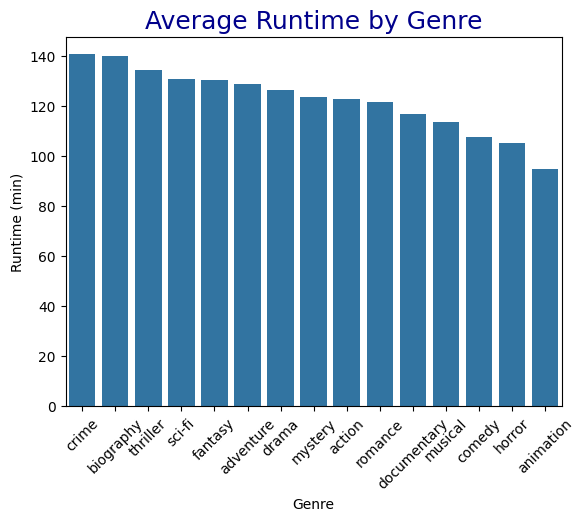

In [5]:


# Calculate the average runtime by genre
runtime = df.groupby('Genre')['Runtime (min)'].mean().sort_values(ascending=False).reset_index()

# Create a bar plot
ax = sns.barplot(x="Genre", y="Runtime (min)", data=runtime)

# Rotate the x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title and adjust its color and font size
plt.title("Average Runtime by Genre", color='darkblue', fontsize=18)

# Display the plot with rotated x-axis labels
plt.xticks(rotation=45)
plt.show()


##### Average profit by genre

C:\Users\gaura\AppData\Local\Temp\ipykernel_21396\208358011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Profit ($mill)', data=profitGenre, palette=genre_colors)


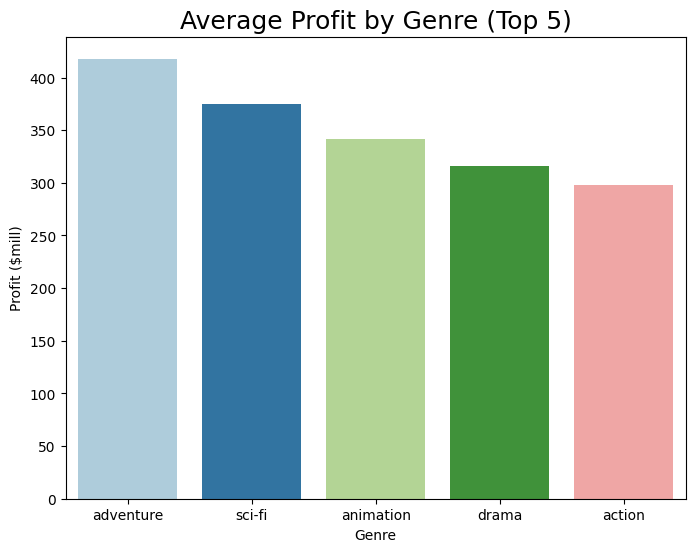

In [13]:

# Convert 'Profit ($mill)' to numeric type if it's not already
df['Profit ($mill)'] = pd.to_numeric(df['Profit ($mill)'], errors='coerce')

# Calculate the average profit by genre for the top genres
profitGenre = df.groupby('Genre')['Profit ($mill)'].mean().nlargest(5).reset_index()

genre_colors = sns.color_palette('Paired', n_colors=len(profitGenre))

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.barplot(x='Genre', y='Profit ($mill)', data=profitGenre, palette=genre_colors)

# Set the title and adjust its color and font size
plt.title("Average Profit by Genre (Top 5)", fontsize=18)

# Display the bar plot
plt.show()


##### Average budget by genre

C:\Users\gaura\AppData\Local\Temp\ipykernel_21396\724411080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Budget ($mill)', data=profitGenre, palette=genre_colors)


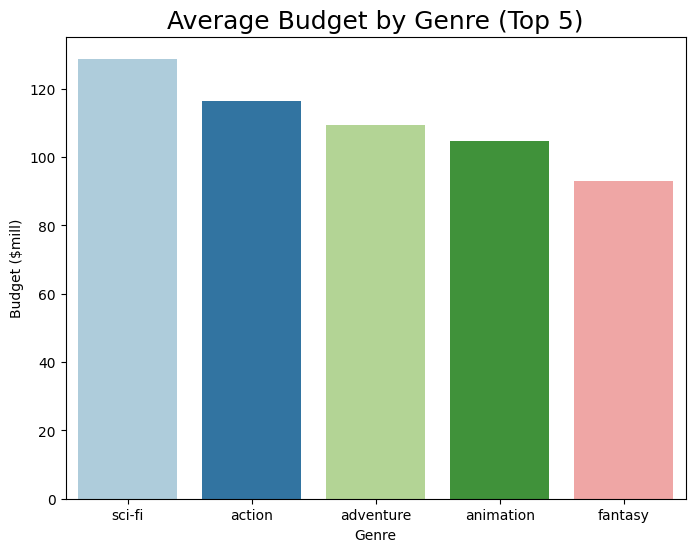

In [14]:

# Convert 'Profit ($mill)' to numeric type if it's not already
# df['Budget ($mill)'] = pd.to_numeric(df['Budget ($mill)'], errors='coerce')

# Calculate the average profit by genre for the top genres
profitGenre = df.groupby('Genre')['Budget ($mill)'].mean().nlargest(5).reset_index()

genre_colors = sns.color_palette('Paired', n_colors=len(profitGenre))

# Create a bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.barplot(x='Genre', y='Budget ($mill)', data=profitGenre, palette=genre_colors)

# Set the title and adjust its color and font size
plt.title("Average Budget by Genre (Top 5)", fontsize=18)

# Display the bar plot
plt.show()


##### Top ten best-rated movies

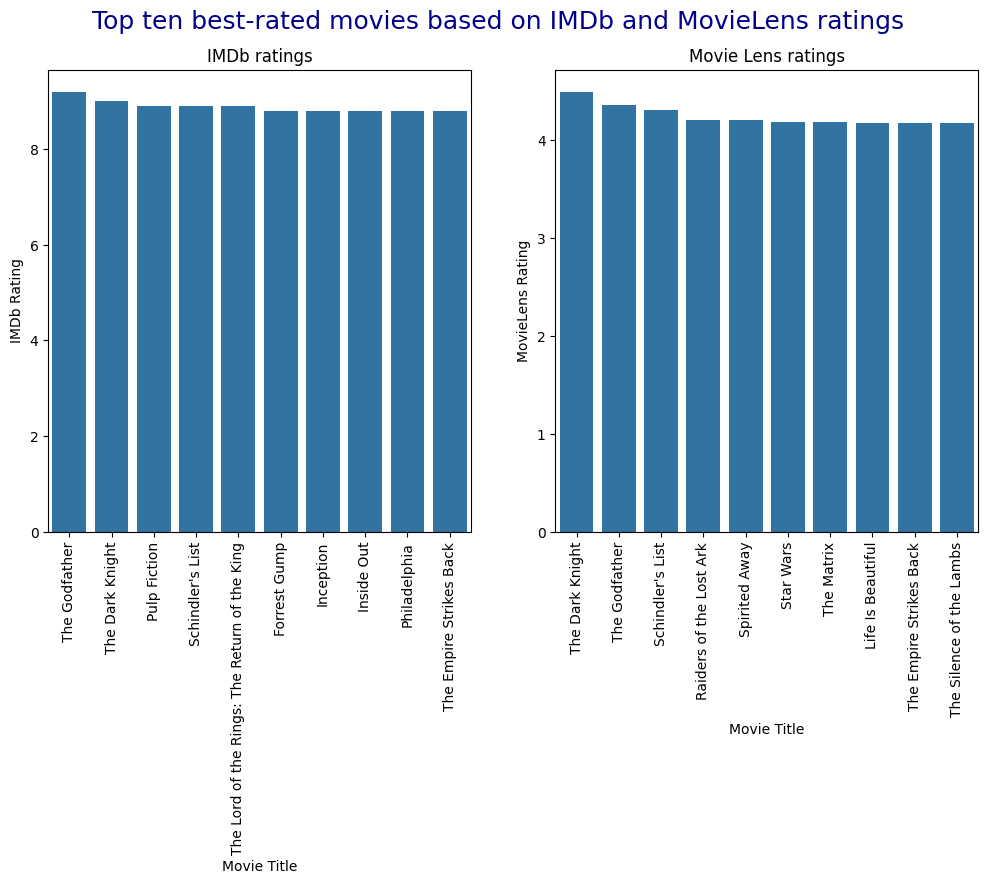

In [22]:
# Top ten best-rated movies based on IMDb and MovieLens ratings
imdbRating = df.groupby('Movie Title')['IMDb Rating'].mean().nlargest(10).reset_index()
movieLensRating = df.groupby('Movie Title')['MovieLens Rating'].mean().nlargest(10).reset_index()

# Create subplots for IMDb and MovieLens ratings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
imdb_plot = sns.barplot(x="Movie Title", y="IMDb Rating", data=imdbRating, ax=axes[0])
movielens_plot = sns.barplot(x="Movie Title", y="MovieLens Rating", data=movieLensRating, ax=axes[1])

# Rotate x-axis labels for better readability
for ax in axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

# Set titles for the subplots
axes[0].set_title("IMDb ratings")
axes[1].set_title("Movie Lens ratings")

# Set the overall title for the plot
fig.suptitle('Top ten best-rated movies based on IMDb and MovieLens ratings', fontsize=18, color='darkblue')

plt.show()


#The Godfather and The Dark Knight were the most rated on IMDb and Movie Lens respectively.



# ML Models

##### Movie Recommendation System using Content-Based Filtering


Content-based filtering is a recommendation technique that suggests items to users based on the characteristics and content of the items themselves. In the context of movies, for example, it recommends similar movies to a given input movie by analyzing attributes such as genre, director, and user ratings, without relying on the behavior or preferences of other users.






In [212]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Assuming your data is stored in a DataFrame called 'df'
df = pd.read_csv('..//data/processed/DataSet1 - DataSet1.csv')

# Replace 'YOUR_COLUMN_NAME' with the actual column names from your dataset
features = ['Genre', 'Director', 'Studio', 'IMDb Rating']

# Combine selected features into a single column
df['combined_features'] = df[features].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Use linear kernel for cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get movie recommendations based on input movie title
def get_recommendations(title):
    # Convert input title to lowercase for case-insensitive matching
    title = title.lower()

    if title not in df['Movie Title'].str.lower().values:
        return "Movie not found in the database."

    idx = df[df['Movie Title'].str.lower() == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get top 10 recommendations

    movie_indices = [i[0] for i in sim_scores]

    return df['Movie Title'].iloc[movie_indices]

# Example usage
movie_title = 'The Dark Knight'
recommendations = get_recommendations(movie_title)
print("Recommended movies for '{}':\n{}".format(movie_title, recommendations))

Recommended movies for 'The Dark Knight':
538                Inception
569          The Dark Knight
571    The Dark Knight Rises
475             Interstellar
19              Jack Reacher
190                     Bolt
462               Big Hero 6
332           Batman Returns
519                   Batman
211       Mad Max: Fury Road
Name: Movie Title, dtype: object


##### IMDb Rating Prediction

The "IMDb Rating Prediction" model aims to estimate IMDb ratings for movies based on various features such as budget, gross earnings, runtime, and the percentage of gross earnings from the US market.

In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Selecting features and target variable
X = df[['Budget ($mill)', 'Gross ($mill)', 'Runtime (min)', 'Gross % US']]
y = df['IMDb Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Example of predicting IMDb rating for a new movie
new_movie = [[100, 200, 120, 60]]  # Example budget, gross, runtime, gross % US
predicted_rating = model.predict(new_movie)
print('Predicted IMDb Rating for the new movie:', predicted_rating)

Mean Squared Error: 0.6693953737230645
Predicted IMDb Rating for the new movie: [6.80067446]


c:\Users\gaura\anaconda3\envs\mlops_isa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


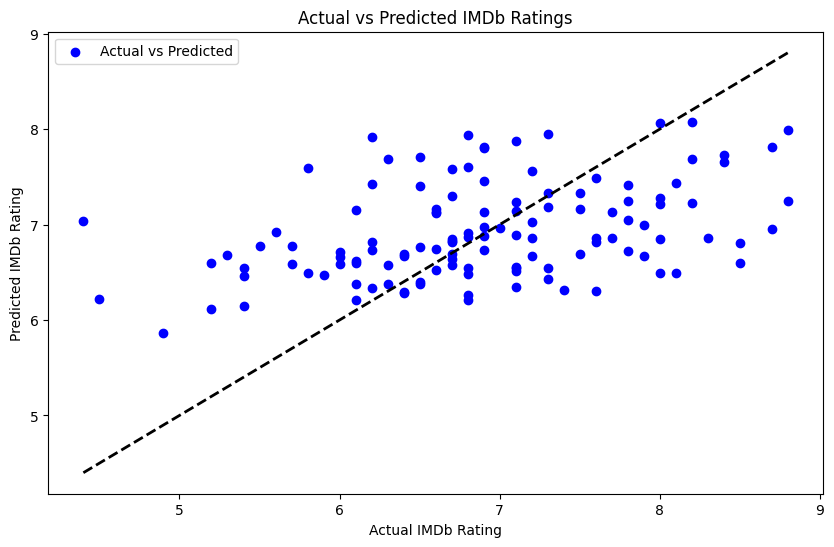

In [184]:
# Plotting actual vs predicted ratings with legends
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Actual vs Predicted IMDb Ratings')
plt.legend()
plt.show()


MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance in terms of prediction accuracy.

In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Load the movie dataset
# data = pd.read_csv('your_movie_dataset.csv')

# Selecting features and target variable
X = df[['Budget ($mill)', 'Gross ($mill)', 'Runtime (min)', 'Gross % US']]
y = df['IMDb Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f'{name}: Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}')

# Example of predicting IMDb rating for a new movie using Linear Regression model
new_movie = [[100, 200, 120, 60]]  # Example budget, gross, runtime, gross % US
predicted_rating = models['LinearRegression'].predict(new_movie)
print('Predicted IMDb Rating for the new movie using Linear Regression:', predicted_rating)


LinearRegression: Mean Squared Error: 0.67, R-squared: 0.21, MAE: 0.66, RMSE: 0.82
RandomForestRegressor: Mean Squared Error: 0.79, R-squared: 0.07, MAE: 0.71, RMSE: 0.89
KNeighborsRegressor: Mean Squared Error: 0.77, R-squared: 0.09, MAE: 0.69, RMSE: 0.88
DecisionTreeRegressor: Mean Squared Error: 1.42, R-squared: -0.68, MAE: 0.97, RMSE: 1.19
BaggingRegressor: Mean Squared Error: 0.76, R-squared: 0.10, MAE: 0.70, RMSE: 0.87
AdaBoostRegressor: Mean Squared Error: 0.75, R-squared: 0.11, MAE: 0.69, RMSE: 0.87
GradientBoostingRegressor: Mean Squared Error: 0.66, R-squared: 0.22, MAE: 0.65, RMSE: 0.81
Predicted IMDb Rating for the new movie using Linear Regression: [6.80067446]


c:\Users\gaura\anaconda3\envs\mlops_isa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression:

Mean Squared Error (MSE): 0.67
R-squared: 0.21
Mean Absolute Error (MAE): 0.66
Root Mean Squared Error (RMSE): 0.82
Interpretation: The linear regression model has a relatively low MSE, indicating that it provides a good fit to the data and accurate predictions. The R-squared value of 0.21 suggests that approximately 21% of the variability in the IMDb ratings is explained by the model. The MAE and RMSE values of 0.66 and 0.82, respectively, demonstrate relatively small average prediction errors.

GradientBoostingRegressor:

Mean Squared Error (MSE): 0.66
R-squared: 0.22
Mean Absolute Error (MAE): 0.65
Root Mean Squared Error (RMSE): 0.81
Interpretation: The Gradient Boosting model demonstrates strong performance, with the lowest MSE among the models and the highest R-squared value of 0.22, indicating that it explains a relatively high proportion of the variability in IMDb ratings. Additionally, the MAE and RMSE values are the lowest, signifying smaller prediction errors.

##### Profit Prediction

The model aims to predict movie profits based on a range of features

In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# data = pd.read_csv('path_to_your_file.csv')
data = df.copy()
# Remove commas and convert 'Profit ($mill)' column to float
data['Profit ($mill)'] = data['Profit ($mill)'].str.replace(',', '').astype(float)

# Preprocessing - encoding categorical variables
label_encoders = {}
for column in ['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date', 'Studio']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Define features and target
features = ['Budget ($mill)', 'Gross ($mill)', 'IMDb Rating', 'MovieLens Rating', 'Overseas%', 'Runtime (min)', 'US ($mill)', 'Gross % US', 'year']
target = 'Profit ($mill)'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.06312374045041272
R-squared: 0.9999985778493762


In [211]:
# features = ['Budget ($mill)', 'Gross ($mill)', 'IMDb Rating', 'MovieLens Rating', 'Overseas%', 'Runtime (min)', 'US ($mill)', 'Gross % US', 'year']
new_movie_features = [[170, 200, 7.0, 3.2, 55, 130, 90,44, 2015]]  # Example features for a new movie
predicted_profit = model.predict(new_movie_features)
print('Predicted Profit for the new movie using Linear Regression:', predicted_profit)

Predicted Profit for the new movie using Linear Regression: [29.80524896]


c:\Users\gaura\anaconda3\envs\mlops_isa\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


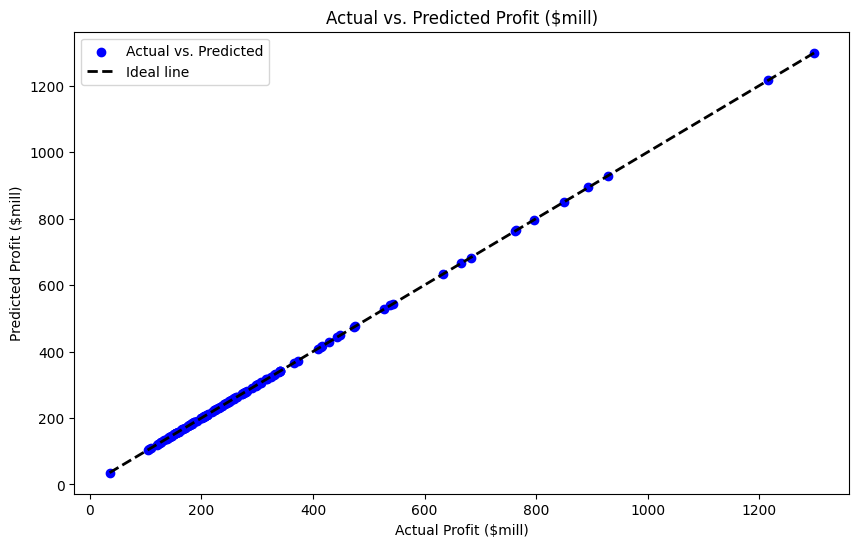

In [194]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal line')
plt.xlabel('Actual Profit ($mill)')
plt.ylabel('Predicted Profit ($mill)')
plt.title('Actual vs. Predicted Profit ($mill)')
plt.legend()
plt.show()
